📝 *Import required libraries and files:*

In [24]:
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [25]:
path = r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout\df_complete.xlsx"
df = pd.read_excel(path)
pd.set_option('display.max_columns', None)
print(f"Shape of df: {df.shape}")

Shape of df: (8996, 141)


# 2.1. - Data Cleaning

### 2.1.1. - Creation of `df_cleaned`

**Create `PlayerID`**

In [26]:
df.insert(0, "PlayerID", range(1, len(df) + 1))

In [27]:
df.head(2)

,PlayerID,League,Rk,Player,Nation,Pos,Squad,Playing Time MP,Playing Time Starts,Playing Time Min,Playing Time 90s,Performance Gls,Performance Ast,Performance G+A,Performance G-PK,Performance PK,Performance PKatt,Performance CrdY,Performance CrdR,Expected xG,Expected npxG,Expected xAG,Expected npxG+xAG,Progression PrgC,Progression PrgP,Progression PrgR,Per 90 Minutes Gls,Per 90 Minutes Ast,Per 90 Minutes G+A,Per 90 Minutes G-PK,Per 90 Minutes G+A-PK,Per 90 Minutes xG,Per 90 Minutes xAG,Per 90 Minutes xG+xAG,Per 90 Minutes npxG,Per 90 Minutes npxG+xAG,Standard Sh,Standard SoT,Standard SoT%,Standard Sh/90,Standard SoT/90,Standard G/Sh,Standard G/SoT,Standard Dist,Standard FK,Standard PK,Standard PKatt,Expected npxG/Sh,Expected G-xG,Expected np:G-xG,Total Cmp,Total Att,Total Cmp%,Total TotDist,Total PrgDist,Short Cmp,Short Att,Short Cmp%,Medium Cmp,Medium Att,Medium Cmp%,Long Cmp,Long Att,Long Cmp%,Ast,xAG,Expected xA,Expected A-xAG,KP,1/3,PPA,CrsPA,PrgP,SCA SCA,SCA SCA90,SCA Types PassLive,SCA Types PassDead,SCA Types TO,SCA Types Sh,SCA Types Fld,SCA Types Def,GCA GCA,GCA GCA90,GCA Types PassLive,GCA Types PassDead,GCA Types TO,GCA Types Sh,GCA Types Fld,GCA Types Def,Tackles Tkl,Tackles TklW,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Challenges Tkl,Challenges Att,Challenges Tkl%,Challenges Lost,Blocks Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Touches Touches,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Touches Live,Take-Ons Att,Take-Ons Succ,Take-Ons Succ%,Take-Ons Tkld,Take-Ons Tkld%,Carries Carries,Carries TotDist,Carries PrgDist,Carries PrgC,Carries 1/3,Carries CPA,Carries Mis,Carries Dis,Receiving Rec,Receiving PrgR,Performance 2CrdY,Performance Fls,Performance Fld,Performance Off,Performance Crs,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,Age
0,1,arg1,1,Matías Abaldo,URU,FW,Independiente,3,3,201,2.2,0,0,0,0,0,0,0,0,0.2,0.2,0.0,0.2,3,8,13,0.00,0.00,0.00,0.00,0.00,0.07,0.01,0.09,0.07,0.09,2,1,50.0,0.90,0.45,0.00,0.0,16.7,0,0,0,0.08,-0.2,-0.2,45,64,70.3,597,231,29,36,80.6,13,18,72.2,2,4,50.0,0,0.0,0.3,0.0,1,7,1,1,8,4,1.79,4,0,0,0,0,0,0,0.00,0,0,0,0,0,0,2,1,0,2,0,1,2,50.0,1,3,0,3,1,3,1,0,96,1,9,56,31,3,96,8,1,12.5,6,75.0,49,226,82,3,0,1,11,7,73,13,0,0,3,3,2,1,1,0,0,0,7,3,3,50.0,21.0
1,2,arg1,2,Lucas Abascia,ARG,DF,Cen. Córdoba–SdE,14,11,1063,11.8,1,1,2,1,0,0,2,0,0.8,0.8,0.1,0.9,7,46,2,0.08,0.08,0.17,0.08,0.17,0.07,0.01,0.07,0.07,0.07,9,2,22.2,0.76,0.17,0.11,0.5,17.2,0,0,0,0.09,0.2,0.2,543,683,79.5,11682,4182,149,172,86.6,306,341,89.7,85,158,53.8,1,0.1,0.3,0.9,2,30,4,0,46,9,0.76,7,0,0,2,0,0,3,0.25,2,0,0,1,0,0,26,17,16,9,1,18,25,72.0,7,16,9,7,36,62,93,1,880,85,415,446,28,12,880,7,4,57.1,3,42.9,450,2388,1438,7,5,0,8,2,494,2,0,6,11,0,0,36,17,0,0,0,70,32,32,50.0,30.0


**Adjust column names** to facilitate understanding and further analysis.

In [28]:
df = df.rename(columns={
    "Playing Time MP": "Matches",
    "Playing Time Starts": "Starts",
    "Playing Time Min": "Minutes",
    "Performance Gls": "Goals",
    "Performance Ast": "Assists",
    "Performance G+A": "Goals+Assists",
    "Performance G-PK": "Goals not Penalty",
    "Performance PK": "Penalty Goals",
    "Performance PKatt": "Penalty Attempts",
    "Performance CrdY": "Yellow Cards",
    "Performance CrdR": "Red Cards",
    "Expected xG": "Expected Goals",
    "Progression PrgC": "Prog Carries",
    "Progression PrgP": "Prog Passes",
    "Expected G-xG": "Goals Minus Expected",
    "Total Cmp": "Cmp Passes",
    "Total Cmp%": "Cmp Passes%",
    "Total TotDist":"Passing Distance",
    "Total PrgDist":"Pass Prog Distance",
    "SCA SCA":"Shoot Creating Actions",
    "Standard Sh":"Shoots",
    "Standard SoT":"Shoots on Target",
    "Standard SoT%":"Shoots on Target %",
    "Standard G/Sh":"Goals/Shoot",
    "Standard G/SoT":"Goals/Shoot_Target",
    "Standard Dist":"AvgShoot Distance",
    "Standard FK":"FreeKick Shoots",
    "KP":"Key Passes",
    "1/3":"Passes Att 3rd",
    "PPA":"Passes Penalty Area",
    "Blocks Blocks":"Blocks",
    "Int":"Interceptions",
    "Clr":"Clearances",
    "Err":"Errors",
    "Touches Touches":"Touches",
    "Tackles Tkl":"Tackles",
    "Tackles TklW":"Tackles Won",
    "Carries Carries":"Carries",
    "GCA GCA":"Goal Creating Actions",
    "Performance Fls":"Fouls Commited",
    "Performance Fld":"Fouls Suffered",
    "Performance Off":"Offsides",
    "Performance Crs":"Crosses",
    "Performance PKwon":"Penalty Won",
    "Performance PKcon":"Penalty Commited",
    "Performance OG":"Own Goals",
    "Performance Recov":"Ball Recoveries"   
})

**Creation of new variables**

In [29]:
df['Aerial Duels']=df['Aerial Duels Won']+df['Aerial Duels Lost']
df['Penalty Efficacy']=df['Penalty Goals']/df['Penalty Attempts']

**Drop unnecessary columns**

In [30]:
cols_to_drop = [
    "Rk","Playing Time 90s", "Expected npxG", "Expected xAG", "Progression PrgR", "Per 90 Minutes xAG", "Per 90 Minutes xG+xAG",
    "Per 90 Minutes npxG","Per 90 Minutes npxG+xAG", "Standard PK", "Standard PKatt","Expected npxG+xAG","Expected npxG/Sh","Expected np:G-xG",
    "Ast","xAG","Expected xA","Expected A-xAG","PrgP","SCA Types PassLive","SCA Types PassDead","SCA Types TO","SCA Types Sh",
    "SCA Types Sh","SCA Types Fld","SCA Types Def","GCA Types PassLive","GCA Types PassDead","GCA Types TO","GCA Types Sh",
    "GCA Types Fld","GCA Types Def","Take-Ons Tkld","Take-Ons Tkld%","Receiving Rec","Receiving PrgR","Carries PrgC","Performance 2CrdY",
    "Performance TklW","Challenges Lost","Short Att","Medium Att","Long Att","CrsPA","Challenges Tkl","Challenges Att","Challenges Tkl%",
    "Total Att","Touches Live","Performance Int","Carries Mis","Carries Dis",'Aerial Duels Won','Aerial Duels Lost','Blocks Sh','Blocks Pass',
    'Tkl+Int','Touches Def Pen','Touches Att Pen','Carries CPA','GCA GCA90','SCA SCA90','Per 90 Minutes Gls','Per 90 Minutes Ast',
    'Per 90 Minutes G+A','Per 90 Minutes G+A-PK','Per 90 Minutes G-PK', 'Per 90 Minutes xG','Standard Sh/90','Standard SoT/90','Goals/Shoot_Target',
    'Goals+Assists','Shoots on Target %','Penalty Attempts'
]
    
df.drop(columns=cols_to_drop, inplace=True)

print(f"Shape: {df.shape}")

Shape: (8996, 71)


**Set column order** by topic

In [31]:
cols_order = [
    # Player Info
    'PlayerID','Player','League','Squad','Pos','Age','Nation','Matches','Starts','Minutes',
    # Ofensive Stats
    'Goals','Expected Goals','Goals Minus Expected','Goals not Penalty','Penalty Goals','Penalty Efficacy',
    'Shoots','Shoots on Target','Goals/Shoot','AvgShoot Distance','FreeKick Shoots',
    'Assists','Crosses',
    'Penalty Won','Offsides',
    #Passing
    'Cmp Passes','Cmp Passes%', 'Prog Passes', 'Passing Distance','Pass Prog Distance',
    'Short Cmp', 'Short Cmp%', 'Medium Cmp', 'Medium Cmp%', 'Long Cmp', 'Long Cmp%',
    'Key Passes','Passes Att 3rd','Passes Penalty Area', 'Shoot Creating Actions','Goal Creating Actions',
    # Possession
    'Take-Ons Att','Take-Ons Succ','Take-Ons Succ%','Fouls Suffered',
    'Carries','Carries TotDist','Prog Carries','Carries PrgDist','Carries 1/3', 
    'Touches','Touches Def 3rd','Touches Mid 3rd','Touches Att 3rd','Errors',
    # Defensive
    'Aerial Duels','Aerial Duels Won%',
    'Tackles','Tackles Won','Tackles Def 3rd', 'Tackles Mid 3rd', 'Tackles Att 3rd',
    'Blocks','Interceptions','Ball Recoveries','Clearances',
    'Own Goals',
    # Discipline
    'Fouls Commited','Penalty Commited','Yellow Cards','Red Cards'
]

In [32]:
# safety check (raises if missed or duplicated any column)
assert set(cols_order) == set(df.columns)
df = df.loc[:, cols_order]

In [33]:
from collections import Counter
import difflib

order = cols_order
actual = list(df.columns)

set_order, set_actual = set(order), set(actual)

missing_in_order = [c for c in actual if c not in set_order]   # in df but not in your list
extra_in_order   = [c for c in order  if c not in set_actual]  # in your list but not in df
dups_in_order    = [c for c, n in Counter(order).items() if n > 1]
dups_in_df       = [c for c, n in Counter(actual).items() if n > 1]

print("→ Missing in cols_order:", missing_in_order)
print("→ Extra (typo/mismatch) in cols_order:", extra_in_order)
print("→ Duplicates in cols_order:", dups_in_order)
print("→ Duplicates in df.columns:", dups_in_df)

# show closest matches for suspicious names
for c in extra_in_order:
    print(f"  {c!r} closest in df:", difflib.get_close_matches(c, actual, n=3))

# reveal hidden whitespace
suspect_ws = [c for c in actual if c.strip() != c]
if suspect_ws:
    print("→ Columns with leading/trailing spaces in df:", [repr(c) for c in suspect_ws])


→ Missing in cols_order: []
→ Extra (typo/mismatch) in cols_order: []
→ Duplicates in cols_order: []
→ Duplicates in df.columns: []


In [34]:
df_cleaned = df
print(f"Shape df_cleaned: {df_cleaned.shape}")
df_cleaned.head(2)

Shape df_cleaned: (8996, 71)


,PlayerID,Player,League,Squad,Pos,Age,Nation,Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Shoots,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Passes Att 3rd,Passes Penalty Area,Shoot Creating Actions,Goal Creating Actions,Take-Ons Att,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards
0,1,Matías Abaldo,arg1,Independiente,FW,21.0,URU,3,3,201,0,0.2,-0.2,0,0,NaN,2,1,0.00,16.7,0,0,2,0,3,45,70.3,8,597,231,29,80.6,13,72.2,2,50.0,1,7,1,4,0,8,1,12.5,3,49,226,3,82,0,96,9,56,31,0,6,50.0,2,1,0,2,0,3,1,7,1,0,0,0,0,0
1,2,Lucas Abascia,arg1,Cen. Córdoba–SdE,DF,30.0,ARG,14,11,1063,1,0.8,0.2,1,0,NaN,9,2,0.11,17.2,0,1,0,0,0,543,79.5,46,11682,4182,149,86.6,306,89.7,85,53.8,2,30,4,9,3,7,4,57.1,11,450,2388,7,1438,5,880,415,446,28,1,64,50.0,26,17,16,9,1,16,36,70,93,0,6,0,2,0


**Save file**

In [35]:
df_cleaned.to_excel(r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout\df_cleaned.xlsx", index=False)

### 2.1.2. - Creation of `df_normalized`

**Create `df_normalized`** where player stats are divided by minutes played.

In [13]:
cols_normalize = [
    'Goals','Expected Goals','Goals Minus Expected','Goals not Penalty','Penalty Goals','Shoots','Shoots on Target',
    'FreeKick_Shoots','Assists','Crosses','Penalty Won','Offsides','Attempt Passes','Prog Passes','Passing Distance','Pass Prog Distance',
    'Short Cmp','Medium Cmp','Long Cmp','Key Passes','Passes Att 3rd','Passes Penalty Area','Shoot Creating Actions','Goal Creating Actions',
    'Take-Ons Att','Take-Ons Succ','Fouls Suffered','Carries','Carries TotDist','Prog Carries','Carries PrgDist','Carries 1/3','Touches',
    'Touches Def 3rd','Touches Med 3rd','Touches Att 3rd','Errors','Aerial Duels','Tackles','Tackles Won','Tackles Def 3rd', 'Tackles Mid 3rd',
    'Tackles Att 3rd','Blocks','Interceptions','Ball Recoveries','Clearances','Own Goals','Fouls Commited','Penalty Commited','Yellow Cards','Red Cards'
]

df_normalized = df_cleaned.copy()

# keep only columns that actually exist and aren’t 'Minutes'
cols_ok = [c for c in cols_normalize if c in df_normalized.columns and c != "Minutes"]

# minutes as numeric and protect against 0
m = pd.to_numeric(df_normalized["Minutes"], errors="coerce")
den = m.replace(0, np.nan)

# convert selected columns to per90 (in place) – order is preserved
df_normalized[cols_ok] = (df_normalized[cols_ok].div(den, axis=0) * 90).round(3)

# Fills NaNs with zero:
df_normalized[cols_ok] = df_normalized[cols_ok].fillna(0.0)

In [14]:
print(f"Shape df_normalized: {df_normalized.shape}")
df_normalized.head(2)

Shape df_normalized: (8151, 71)


,PlayerID,Player,League,Squad,Pos,Age,Nation,Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Shoots,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Passes Att 3rd,Passes Penalty Area,Shoot Creating Actions,Goal Creating Actions,Take-Ons Att,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards
0,1,Matías Abaldo,arg1,Independiente,FW,21.0,URU,3,3,201,0.000,0.090,-0.090,0.000,0.0,NaN,0.896,0.448,0.00,16.7,0,0.000,0.896,0.0,1.343,45,70.3,3.582,267.313,103.433,12.985,80.6,5.821,72.2,0.896,50.0,0.448,3.134,0.448,1.791,0.000,3.582,0.448,12.5,1.343,21.94,101.194,1.343,36.716,0.000,42.985,4.030,56,13.881,0.000,2.687,50.0,0.896,0.448,0.000,0.896,0.000,1.343,0.448,3.134,0.448,0.0,0.000,0.0,0.000,0.0
1,2,Lucas Abascia,arg1,Cen. Córdoba–SdE,DF,30.0,ARG,14,11,1063,0.085,0.068,0.017,0.085,0.0,NaN,0.762,0.169,0.11,17.2,0,0.085,0.000,0.0,0.000,543,79.5,3.895,989.069,354.073,12.615,86.6,25.908,89.7,7.197,53.8,0.169,2.540,0.339,0.762,0.254,0.593,0.339,57.1,0.931,38.10,202.183,0.593,121.750,0.423,74.506,35.136,446,2.371,0.085,5.419,50.0,2.201,1.439,1.355,0.762,0.085,1.355,3.048,5.927,7.874,0.0,0.508,0.0,0.169,0.0


In [15]:
df_normalized.to_excel(r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout\df_normalized.xlsx", index=False)

# 2.2. - Exploratory Data Analysis (EDA)

In this section we perform an exploratory analysis of the data to understand variables' statistics, relationships and distribution.

**General League Statistics**:

In [16]:
df_cleaned.describe()

,PlayerID,Age,Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Shoots,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Passes Att 3rd,Passes Penalty Area,Shoot Creating Actions,Goal Creating Actions,Take-Ons Att,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards
count,8151.000000,8121.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,604.000000,8151.000000,8151.000000,6631.000000,6631.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8089.000000,8151.000000,8151.000000,8151.000000,8151.000000,7995.000000,8151.000000,7967.000000,8151.000000,7611.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,6825.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,7532.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000
mean,4076.000000,26.325329,16.702368,11.854251,1064.079131,1.379095,1.421053,-0.042694,1.264875,0.114219,0.747202,13.313336,4.327322,0.077626,17.831549,0.429641,0.965648,19.460925,0.107471,1.795608,398.443013,75.854061,39.031530,7168.305607,2608.254325,172.448289,85.989631,175.636732,81.520710,40.788247,53.766351,9.927616,31.930070,8.061097,23.514047,2.371611,17.679058,7.783462,45.335282,12.539075,342.780027,1797.751073,17.046007,897.222427,12.386088,626.351859,205.338854,280.502638,146.545455,0.542019,32.085020,47.732408,17.942706,11.036437,8.472212,7.152497,2.317998,11.487670,8.980493,44.054349,27.323273,0.045025,13.162802,0.144645,2.288922,0.105386
std,2353.135355,4.612236,11.298145,10.711068,918.755180,2.669082,2.392655,1.019664,2.381605,0.561840,0.380755,17.121994,6.467177,0.113792,5.662266,1.467413,1.692364,32.944700,0.374634,3.630165,433.702240,11.737508,46.169032,8107.753935,3478.548769,187.342673,10.888724,212.852167,14.323461,55.545792,19.125944,12.962141,40.669852,11.349234,27.436924,3.428595,24.376350,10.953291,23.892185,14.236363,345.684186,1836.301211,22.979558,977.527380,15.652131,609.470124,286.025902,310.452400,173.455272,1.014336,39.405462,23.592562,19.537606,12.219768,10.366140,8.313633,3.035410,12.301681,11.151659,43.148306,39.238567,0.223326,13.182089,0.423897,2.483630,0.332766
min,1.000000,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-7.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2038.500000,23.000000,7.000000,2.000000,256.500000,0.000000,0.100000,-0.400000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,13.800000,0.000000,0.000000,1.000000,0.000000,0.000000,70.000000,69.800000,5.000000,1142.500000,304.000000,32.000000,81.600000,25.000000,75.000000,5.000000,43.600000,1.000000,4.000000,1.000000,3.000000,0.000000,2.000000,1.000000,33.300000,2.000000,71.000000,362.500000,2.000000,160.000000,

In [17]:
league_statistics = df_cleaned.groupby('League').agg({
    'Age': 'mean',
    'Matches': 'max',
    'Minutes': 'sum',
    'Goals': 'sum',
    'Penalty Goals': 'sum',
    'Assists': 'sum',
    'Shoots':'sum',
    'Shoots on Target':'sum',
    'AvgShoot Distance':'mean',
    'Crosses':'sum',    
    'Cmp Passes':'sum',
    'Prog Passes':'sum',
    'Cmp Passes%': 'mean',
    'Aerial Duels': 'sum',
    'Tackles':'sum',
    'Blocks':'sum',
    'Interceptions':'sum',
    'Errors':'sum',
    'Fouls Commited': 'sum',
    'Yellow Cards': 'sum',
    'Red Cards': 'sum',
}).round(1)

league_statistics ['Games Aprx'] = league_statistics ['Minutes'] / (90*22) # 90 minutes and 22 players (11 x 2) --> it's an approximation
league_statistics.drop('Minutes', axis=1, inplace=True)

cols_to_normalize = [
    'Goals','Penalty Goals','Assists',
    'Shoots','Shoots on Target','Crosses',
    'Cmp Passes','Prog Passes',
    'Aerial Duels','Tackles','Blocks','Interceptions','Errors',
    'Fouls Commited','Yellow Cards','Red Cards'
]

league_statistics [cols_to_normalize] =  league_statistics [cols_to_normalize].div(
    league_statistics['Games Aprx'], axis=0
)

league_statistics.drop('Games Aprx', axis=1, inplace=True)

league_statistics = league_statistics.sort_index().round(2)

# Save File as a csv
league_statistics.to_excel(r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout\league_stats.xlsx", index=True)

display (league_statistics)

,Age,Matches,Goals,Penalty Goals,Assists,Shoots,Shoots on Target,AvgShoot Distance,Crosses,Cmp Passes,Prog Passes,Cmp Passes%,Aerial Duels,Tackles,Blocks,Interceptions,Errors,Fouls Commited,Yellow Cards,Red Cards
League,,,,,,,,,,,,,,,,,,,,
arg1,26.6,23,1.90,0.17,1.30,23.08,7.12,19.1,39.06,608.51,71.62,71.0,72.07,36.12,21.85,18.53,0.64,25.29,5.29,0.24
bel1,25.1,30,2.60,0.24,1.77,26.46,8.80,16.9,37.04,750.37,82.41,74.8,63.06,36.51,23.45,18.25,0.81,21.65,4.06,0.23
bra1,27.4,21,2.36,0.23,1.71,25.48,8.13,18.9,37.52,760.01,73.71,79.4,51.17,33.46,20.51,16.50,1.08,27.78,4.73,0.18
eng1,26.5,38,2.85,0.18,2.12,25.75,8.66,16.6,35.27,794.04,74.06,79.0,52.03,35.26,21.81,15.91,1.69,22.14,4.21,0.14
eng2,26.3,46,2.36,0.12,1.65,23.59,7.37,16.9,35.88,706.32,66.07,73.1,69.71,33.09,21.45,16.07,0.80,22.83,3.83,0.12
fra1,25.5,34,2.90,0.30,2.01,24.64,8.77,17.1,34.59,826.72,78.79,79.0,46.11,36.04,21.48,18.16,1.21,24.34,3.82,0.22
ger1,26.6,34,3.06,0.19,2.20,25.82,8.73,16.8,36.53,807.40,75.72,76.1,63.19,31.11,24.44,17.17,1.26,21.44,3.89,0.18
ita1,26.6,38,2.47,0.21,1.77,24.04,7.65,17.8,34.53,760.09,69.00,77.9,57.67,30.47,19.56,14.77,1.10,25.15,3.88,0.20
ita2,26.6,38,2.39,0.18,1.62,25.62,7.81,17.8,38.64,676.50,68.20,75.0,71.80,29.25,20.71,14.52,0.67,30.60,4.96,0.23


While there are no extreme abnormal results, it is possible to see the difference between the leagues, reflecting different playing styles. 

As an example, the portuguese league ('por1') has more penalty goals, fouls, yellow and red cards than average. On the otherside, the english Premier League ('eng1') is characterized by having more goals, assists, % Comp Passes then average.

**Relationship between variables**:

In [18]:
def corr_heatmap(df, cols, method="pearson", figsize=(8,6)):
    """
    Draw a correlation heatmap for selected columns in df.
    """
    cols_ok = [c for c in cols if c in df.columns]
    if not cols_ok:
        raise ValueError("None of the requested columns exist in the DataFrame.")
    if len(cols_ok) < len(cols):
        print("⚠️ Skipping missing columns:", [c for c in cols if c not in cols_ok])

    X = df[cols_ok].apply(pd.to_numeric, errors="coerce")
    corr = X.corr(method=method)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")

    ax.set_xticks(range(len(cols_ok))); ax.set_xticklabels(cols_ok, rotation=45, ha="right")
    ax.set_yticks(range(len(cols_ok))); ax.set_yticklabels(cols_ok)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(f"{method.title()} correlation")

    # annotate cells
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center", fontsize=9)

    ax.set_title("Correlation heatmap")
    plt.tight_layout()
    plt.show()

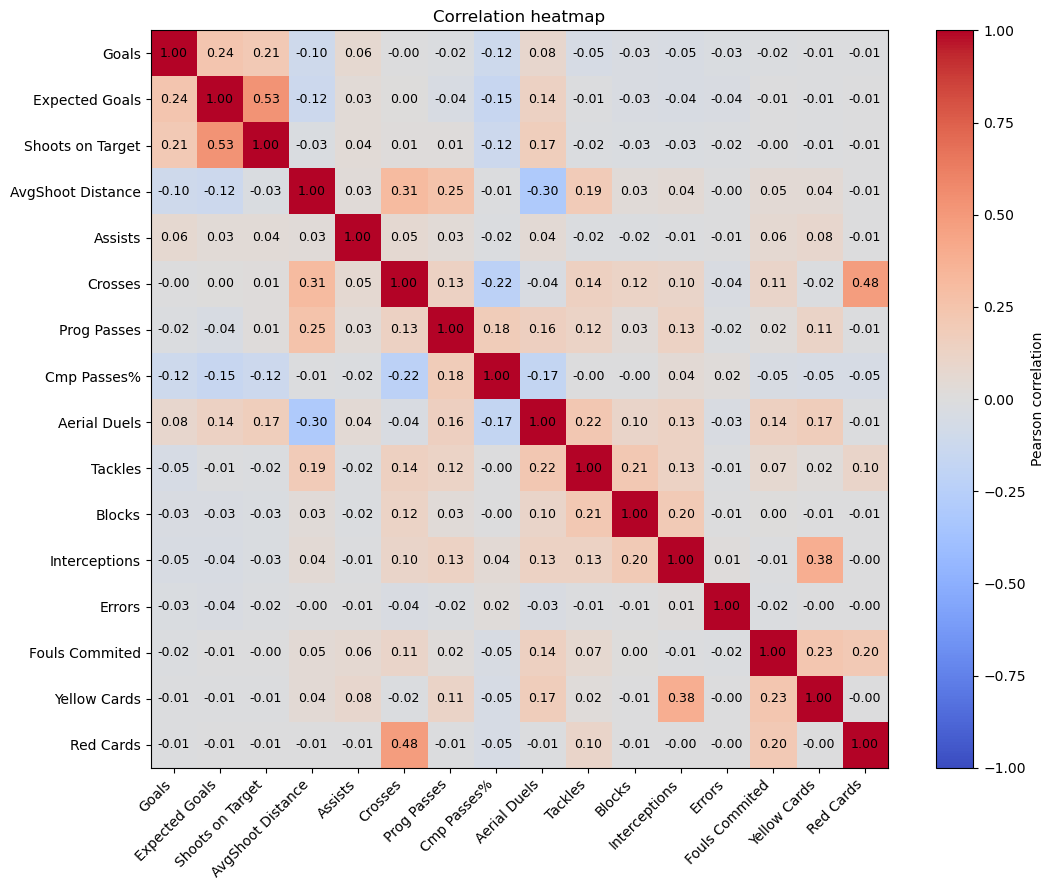

In [19]:
cols_heat = ["Goals", "Expected Goals", "Shoots on Target", "AvgShoot Distance", "Assists", "Crosses", "Prog Passes", "Cmp Passes%",
            "Aerial Duels", "Tackles", "Blocks", "Interceptions", "Errors", "Fouls Commited", "Yellow Cards", "Red Cards"]

corr_heatmap(df=df_normalized, cols= cols_heat, figsize = (13,9))

The correlation between most of the variables is non existent or weak, with few exceptions such as betweeen 'Yellow Cards' and 'Interceptions' and between 'Shoots on Target' and 'Expected Goals'.

**Variance and distribution**:

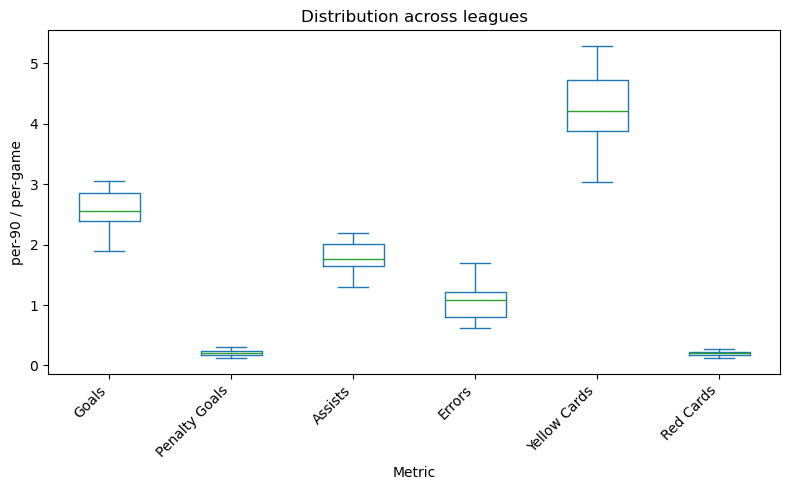

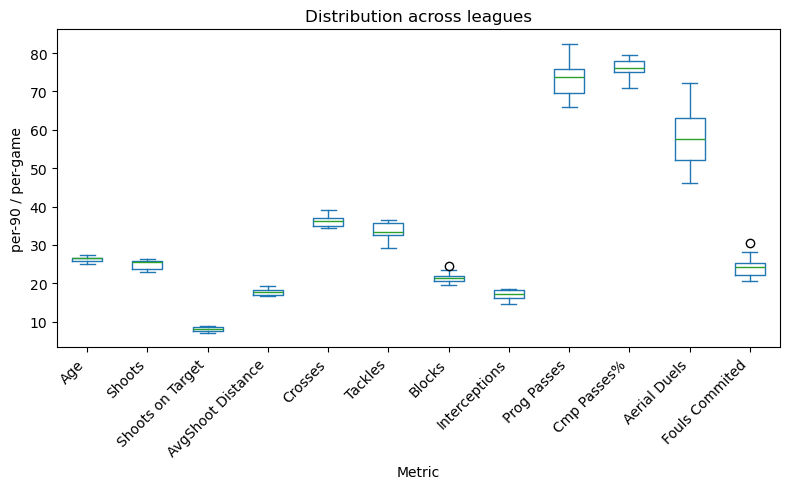

In [23]:
def boxplot_by_metric(league_statistics: pd.DataFrame, metrics, figsize=(8,5), ylabel="per-90 / per-game"):
    cols = [c for c in metrics if c in league_statistics.columns]
    if not cols:
        raise ValueError("None of the requested metrics exist.")
    ax = league_statistics[cols].plot(kind="box", figsize=figsize)
    ax.set_title("Distribution across leagues")
    ax.set_xlabel("Metric")
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


boxplot_by_metric(
    league_statistics,
    ['Goals','Penalty Goals','Assists','Errors','Yellow Cards','Red Cards']
)

boxplot_by_metric(
    league_statistics,
    ['Age','Shoots','Shoots on Target','AvgShoot Distance','Crosses','Tackles','Blocks','Interceptions','Prog Passes','Cmp Passes%','Aerial Duels','Fouls Commited']
)

The fact that the values are not scaled yet, harms visualization. Still, it is possible to observe that some variables (e.g., 'Yellow Cards' and 'Aerial Duels') have more variance than others when comparing league stats. 

In [21]:
def plot_skew_grid(df, cols, bins="auto", ncols=4, figsize=None, winsor=None):
    """
    Small-multiples histograms with skewness per variable.

    df:      origin dataframe
    cols:    list of column names to plot
    bins:    'auto' or an int
    ncols:   number of charts per row
    figsize: (width, height); if None, sized from ncols/rows
    winsor:  optional percentile to clip tails for readability (e.g., 1 or 2)
    """
    cols = [c for c in cols if c in df.columns]
    if not cols:
        raise ValueError("None of the requested columns exist in the DataFrame.")

    k = len(cols)
    nrows = int(np.ceil(k / ncols))
    if figsize is None:
        figsize = (ncols * 3.0, nrows * 2.5)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)
    axes = axes.ravel()

    for ax, c in zip(axes, cols):
        s = pd.to_numeric(df[c], errors="coerce")
        if winsor is not None:
            lo, hi = np.nanpercentile(s, [winsor, 100 - winsor])
            s = s.clip(lo, hi)
        s = s.dropna()
        if s.empty:
            ax.axis("off"); continue

        ax.hist(s, bins=bins)
        mu, med, sk = s.mean(), s.median(), s.skew()

        ax.axvline(mu, linestyle="-", linewidth=1)
        ax.axvline(med, linestyle="--", linewidth=1)
        ax.set_title(c, fontsize=9)
        ax.text(
            0.98, 0.95, f"skew={sk:.2f}\nn={len(s)}",
            transform=ax.transAxes, ha="right", va="top", fontsize=8,
            bbox=dict(boxstyle="round", alpha=0.2, lw=0),
        )
        ax.set_yticks([])

    for ax in axes[k:]:
        ax.axis("off")

    fig.suptitle("Distributions & skewness", y=1.02, fontsize=12)
    fig.tight_layout()
    plt.show()

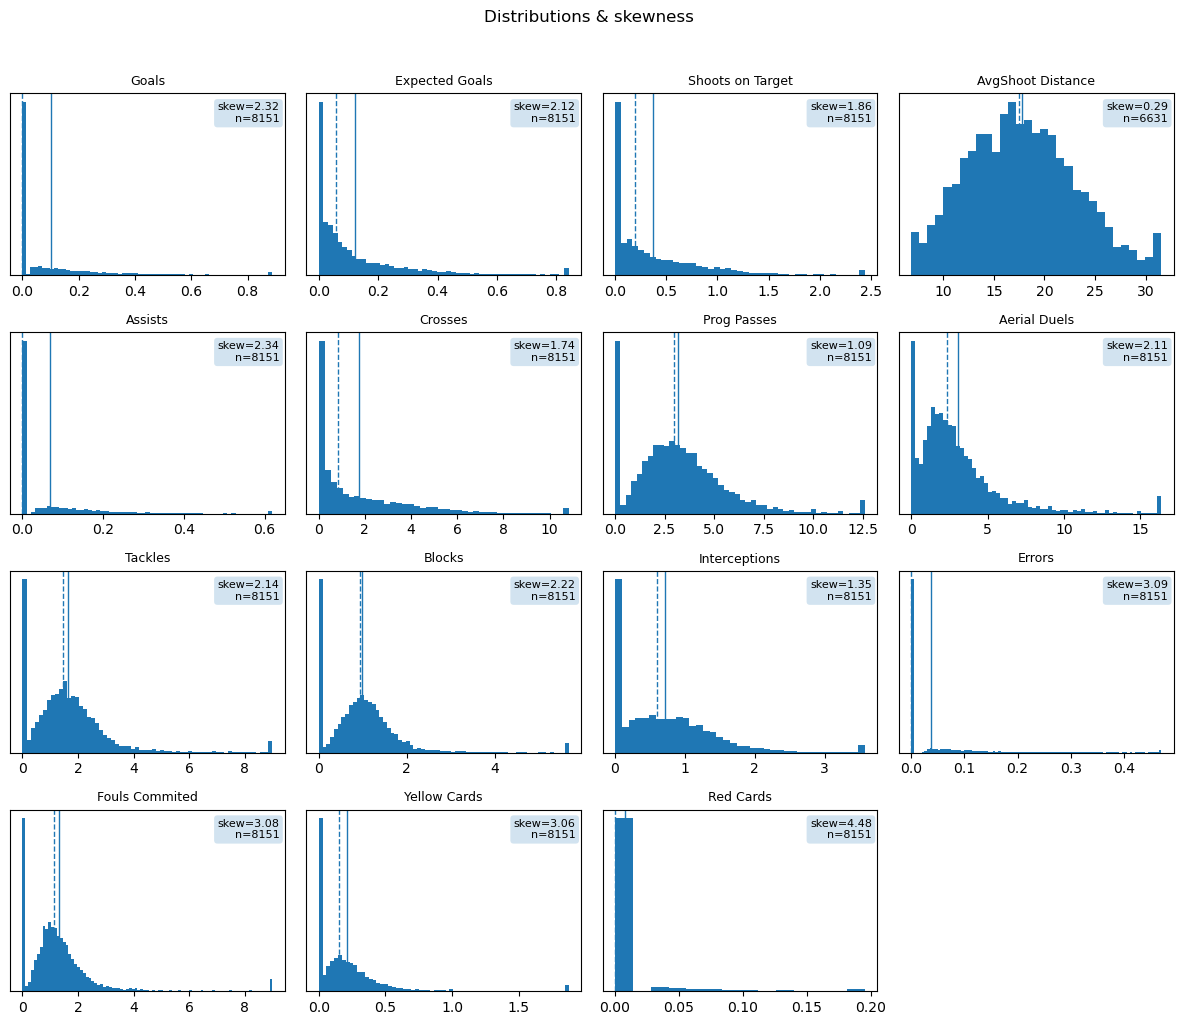

In [22]:
plot_skew_grid(
    df_normalized,
    cols=["Goals", "Expected Goals", "Shoots on Target", "AvgShoot Distance", "Assists", "Crosses", "Prog Passes", "Cmp% Passes",
        "Aerial Duels", "Tackles", "Blocks", "Interceptions", "Errors", "Fouls Commited", "Yellow Cards", "Red Cards"],
    bins="auto",     # or an int like 30
    ncols=4,
    winsor=1         # optional: clip 1% tails to tame outliers
)

**Data is highly right-skewed**. Since `df_normalized` divides each statistic by 90 minutes played, there are many outliers that probably are given by players with few minutes and existent values in the analyzed statistic (e.g., a player that just played 30 min the whole season but scored a goal will have a high value in the variable 'Goals' when normalize). These **outliers will have to be addressed when designing the scouting functions**.